In [1]:
save_name = 'ResNet34_Pleural_Effusion'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\ModelRuns
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.DenseNet import DenseNet

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [5]:
training_columns = ['Pleural_Effusion']
out_channels=len(training_columns)
net_kwargs = {'nr_classes':out_channels}
net = DenseNet(**net_kwargs) 

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 224, 224))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           3,136
              ReLU-2         [-1, 64, 224, 224]               0
       BatchNorm2d-3         [-1, 64, 224, 224]             128
            Conv2d-4         [-1, 32, 224, 224]          18,464
              ReLU-5         [-1, 32, 224, 224]               0
            Conv2d-6         [-1, 32, 224, 224]           9,248
              ReLU-7         [-1, 32, 224, 224]               0
              ReLU-8         [-1, 64, 224, 224]               0
            Conv2d-9         [-1, 32, 224, 224]          18,464
             ReLU-10         [-1, 32, 224, 224]               0
             ReLU-11         [-1, 96, 224, 224]               0
           Conv2d-12         [-1, 32, 224, 224]          27,680
             ReLU-13         [-1, 32, 224, 224]               0
             ReLU-14        [-1, 128, 2

In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=16, 
                                     learning_rate=1e-5, 
                                     num_epochs=2,
                                     device=device, 
                                     net=net,
                                     image_width = 224, #Densenet more memory consuming so pare down size
                                     image_height = 224,
                                     target_columns=training_columns,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'DenseNet',
                                     net_kwargs = net_kwargs)

Number of Training Images: 105,144
Number of Validation Images: 26,604


In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 3869.6942         
Time of Completion: 2020-08-02 16:09:56.869505          
Training Duration: 3:55:52.520286          
Validation Duration: 0:07:45.017904

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pleural_Effusion,35628,30009,0.817136,0.756026,0.785394,0.737392,0.567889



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pleural_Effusion,9106,7394,0.844611,0.769339,0.80522,0.778565,0.6306


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 3346.6851         
Time of Completion: 2020-08-02 20:35:01.441945          
Training Duration: 4:17:49.314946          
Validation Duration: 0:07:15.091966

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pleural_Effusion,35628,29928,0.850941,0.786455,0.817428,0.800066,0.658295



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pleural_Effusion,9106,8407,0.832552,0.800572,0.816249,0.809019,0.674797


Training Duration: 8:28:42.268193



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.748688
Hamming Loss,0.251312
Combined Recall,"[0.8509407906093561, 0.5491748063320984]"
Combined Precision,"[0.7864550095724314, 0.6537690457097033]"
Combined F1,"[0.8174280739573833, 0.5969247666117518]"


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pleural_Effusion,35628,29928,0.850941,0.786455,0.817428,0.800066,0.658295


***** ROC *****


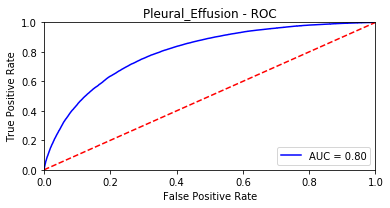

***** Precision / Recall *****


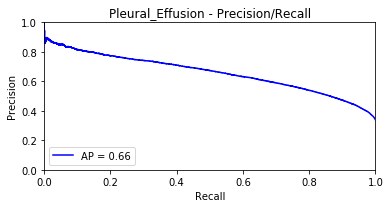


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.753458
Hamming Loss,0.246542
Combined Recall,"[0.832552291690479, 0.6014715572150231]"
Combined Precision,"[0.80057152277848, 0.6514809087665041]"
Combined F1,"[0.8162487743381427, 0.6254782161822646]"


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pleural_Effusion,9106,8407,0.832552,0.800572,0.816249,0.809019,0.674797


***** ROC *****


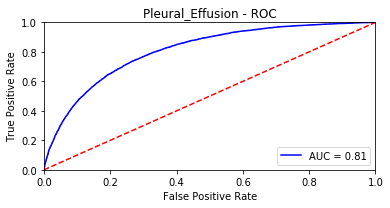

***** Precision / Recall *****


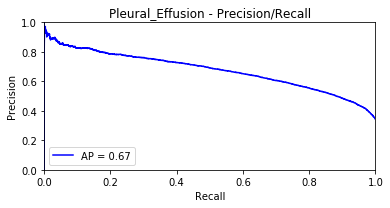

In [8]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


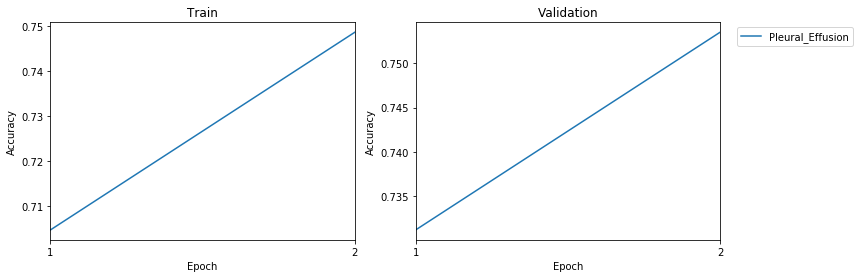


RECALL

▔▔▔


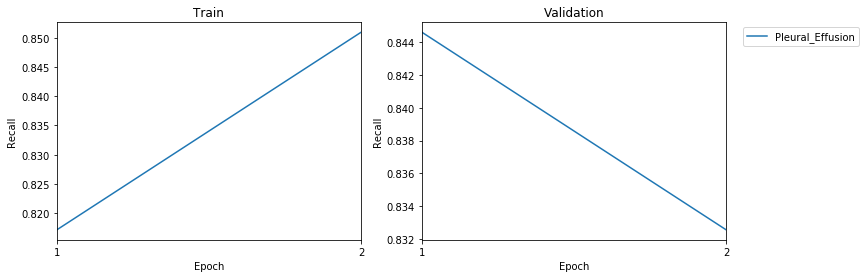


PRECISION

▔▔▔▔▔▔


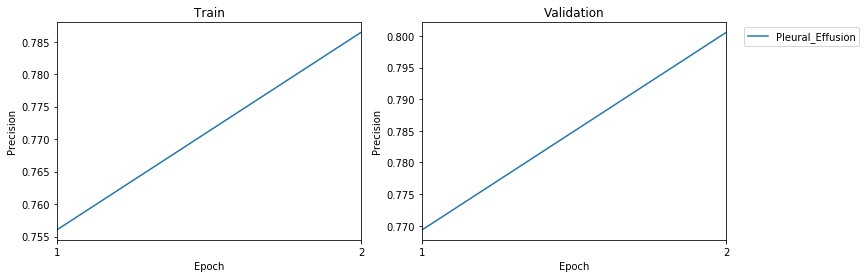


F1

▔


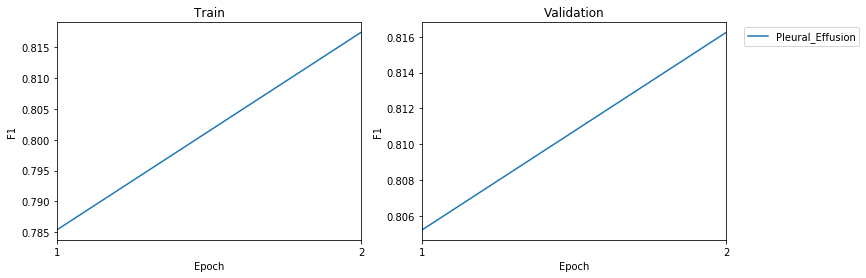


ROC AUC

▔▔▔▔


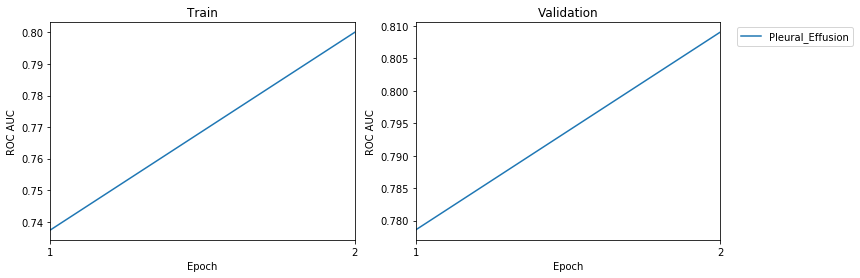


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


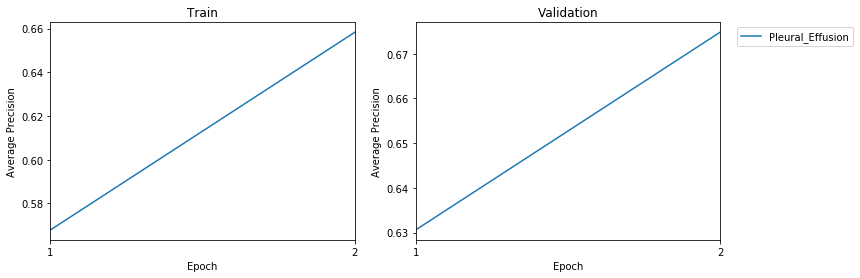

In [9]:
standardTraining.displayEpochProgression()

In [10]:
standardTraining.save()